## **Title :- Traffic Analysis**

**Questions -**
1. Total and Daily pageview events:
- How many total pageview events did the links in the dataset receive during the entire period?
- what is the average number of pageview events per day?
2. Analysis of other events:
- what is the total count and distribution of other recorded events in the dataset?
3. Geographical Distribution:
- which countries contributed to the pageviews?
4. click-through rate (CTR) Analysis:
- what is the overall click-through rate(CTR) calculated as clicks/pageviews?
- How does the CTR vary across different links?
5. Correlation Analysis:
- is there a correlation between clicks and previews on a link ? if so, is it statistically significant  and how strong is the effect?
- perform tests for both potential linear relationships and categorical (binary) relationships between these variables.

### Objective 

The objective of this traffic analysis project is to gain actionable insights into web traffic patterns by analyzing the volume and distribution of events such as pageviews and clicks across different links. The study focuses on understanding geographical contributions, evaluating click-through rates (CTR), and identifying relationships between clicks and pageviews. By applying statistical methods, the analysis aims to uncover factors influencing CTR and propose strategies to improve user engagement and link performance.

### Import Libraries

In [6]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency

import warnings as wr
wr.filterwarnings('ignore')

### Import Dataset

In [8]:
# Importing the traffic dataset
df = pd.read_csv("traffic.csv")

In [9]:
# first five rows of the dataset
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


### Data Cleaning and Preprocessing

In [11]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [12]:
# number of rows and columns
df.shape

(226278, 9)

In [13]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [14]:
# drop un-neccessary columns from dataset
df.drop([ 'isrc'], axis=1, inplace=True)

In [15]:
# statistaical information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   linkid   226278 non-null  object
dtypes: object(8)
memory usage: 13.8+ MB


In [16]:
# describe the dataset
df.describe(include='all')

,event,date,country,city,artist,album,track,linkid
count,226278,226278,226267,226267,226241,226273,226273,226278
unique,3,7,211,11993,2419,3254,3562,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841


In [17]:
# checking null and missing values
df.isnull().sum()

event       0
date        0
country    11
city       11
artist     37
album       5
track       5
linkid      0
dtype: int64

In [18]:
# droping null and  missing values
df.dropna(inplace=True)

In [19]:
#checking duplicated values
df.duplicated().sum()

103696

In [20]:
# drop duplicated values
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis and Data Visualization

In [22]:
df.head()

,event,date,country,city,artist,album,track,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
5,click,2021-08-21,United States,Los Angeles,KenTheMan,I'm Perfect,I'm Perfect,190c7170-4044-4c97-9709-926917155b02


**1. Total and Daily Pageview Events**

Total pageview events did the links in the dataset receive during the entire period

In [25]:
# Filter for pageview events
pageview_data = df[df['event'] == 'pageview']

# Calculate total pageview events
total_pageviews = pageview_data.shape[0]
print(f"Total Pageviews: {total_pageviews}")

Total Pageviews: 73338


Average number of pageview events per day

In [27]:
# Calculate daily total and average pageviews
daily_pageviews = pageview_data.groupby('date').size()
average_daily_pageviews = daily_pageviews.mean()
print(f"Average Daily Pageviews: {average_daily_pageviews}")

Average Daily Pageviews: 10476.857142857143


**2. Analysis of other events**

Total count and distribution of other recorded events in the dataset

Total Count of All Events:
event
pageview    73338
click       32489
preview     16707
Name: count, dtype: int64


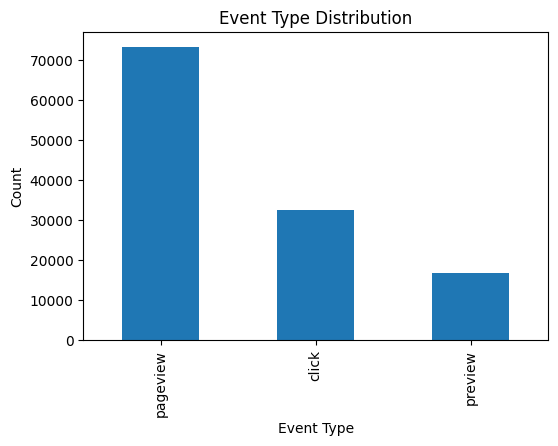

In [30]:
# Total count of all events
total_events = df['event'].value_counts()
print("Total Count of All Events:")
print(total_events)

# Visualize the distribution of events
import matplotlib.pyplot as plt
total_events.plot(kind='bar', title='Event Type Distribution', figsize=(6, 4))
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

**3. Geographical Distribution**

Countries contributed to the pageviews (Top 20 Countries)

Pageviews by Country:
country
United States           18115
India                   10565
France                   6181
Saudi Arabia             3712
United Kingdom           3218
Germany                  2584
Canada                   1702
Turkey                   1598
Pakistan                 1382
Iraq                     1285
Australia                 998
United Arab Emirates      957
Netherlands               826
Norway                    747
Sweden                    723
Belgium                   699
Nigeria                   636
Mexico                    626
Poland                    505
Brazil                    504
dtype: int64


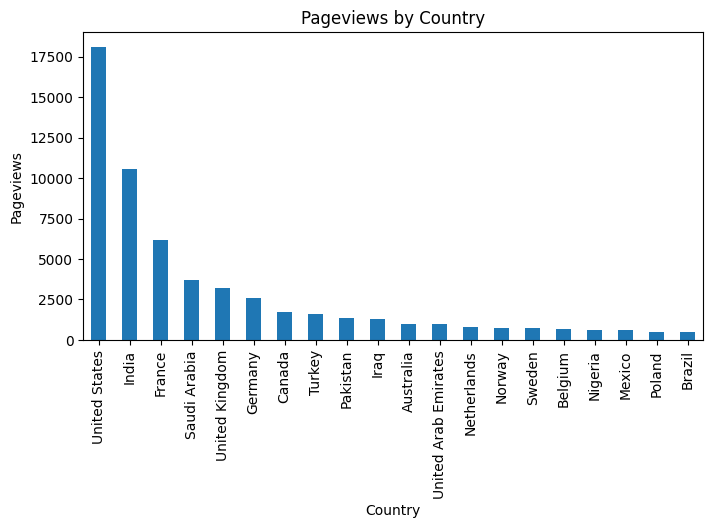

In [33]:
# Calculate pageviews by top 20 country
pageviews_by_country = pageview_data.groupby('country').size().sort_values(ascending=False).head(20)
print("Pageviews by Country:")
print(pageviews_by_country)

# Visualize geographical distribution
pageviews_by_country.plot(kind='bar', title='Pageviews by Country', figsize=(8,4))
plt.xlabel('Country')
plt.ylabel('Pageviews')
plt.show()


**4. click-through rate (CTR) Analysis**

Overall click-through rate(CTR) calculated as clicks/pageviews

In [36]:
# Total clicks and pageviews
click_data = df[df['event'] == 'click']
total_clicks = click_data.shape[0]
overall_ctr = total_clicks / total_pageviews
print(f"Overall CTR: {overall_ctr}")

Overall CTR: 0.44300362704191554


CTR vary across different links

CTR by Link:
linkid
00073307-ae96-5089-a117-4783afb42f8e    0.0
00126b32-0c35-507b-981c-02c80d2aa8e7    1.0
0018cfff-50a1-5984-9715-01ef2d11a49a    0.0
0033934b-5d16-5a06-af58-d087bcdd3680    0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608    0.0
                                       ... 
fff38ca0-8043-50cd-a5f1-f65ebb7105c5    1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7    0.0
fff84c0e-90a1-59d8-9997-adc909d50e16    1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479    0.5
fffd0045-29de-522b-b5d8-35786363bf07    0.5
Length: 3822, dtype: float64


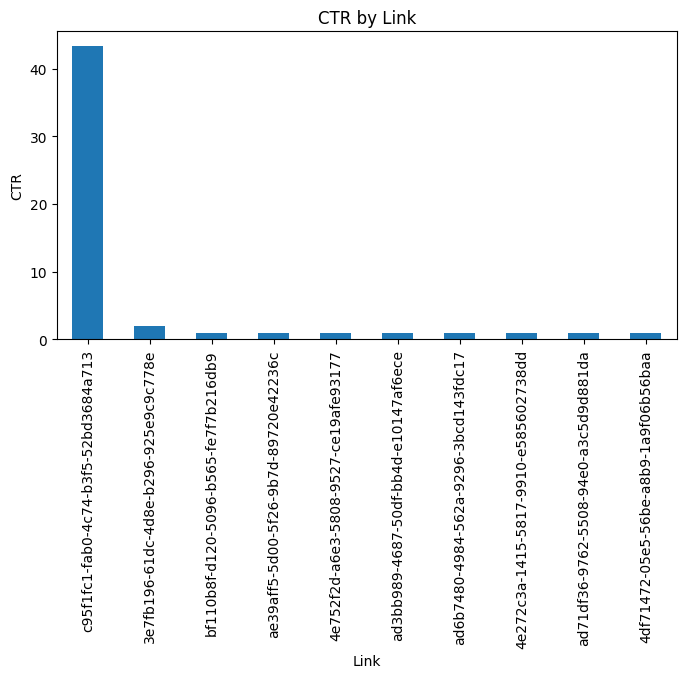

In [38]:
# CTR by link
clicks_by_link = click_data.groupby('linkid').size()
pageviews_by_link = pageview_data.groupby('linkid').size()
ctr_by_link = (clicks_by_link / pageviews_by_link).fillna(0)
print("CTR by Link:")
print(ctr_by_link)

# Visualize Top 10 CTR by link
ctr_by_link.sort_values(ascending=False).head(10).plot(kind='bar', title='CTR by Link', figsize=(8, 4))
plt.xlabel('Link')
plt.ylabel('CTR')
plt.show()

**5. Correlation Analysis**

Correlation between clicks and previews on a link

In [41]:
from scipy.stats import pearsonr

# Aggregate clicks and pageviews by link
link_stats = df.groupby('linkid').agg(
    clicks=('event', lambda x: (x == 'click').sum()),
    pageviews=('event', lambda x: (x == 'pageview').sum())
)

# Step 2: Filter out links with no pageviews
link_stats = link_stats[link_stats['pageviews'] > 0]

# Step 3: Calculate correlation
corr, p_value = pearsonr(link_stats['clicks'], link_stats['pageviews'])
print(f"Correlation Coefficient: {corr}")
print(f"P-Value: {p_value}")

# Step 4: Interpret results
if p_value < 0.05:
    print("The correlation is statistically significant.")
    if abs(corr) >= 0.7:
        print("The effect is strong.")
    elif 0.3 <= abs(corr) < 0.7:
        print("The effect is moderate.")
    else:
        print("The effect is weak.")
else:
    print("The correlation is not statistically significant.")

Correlation Coefficient: 0.990045430725578
P-Value: 0.0
The correlation is statistically significant.
The effect is strong.


Tests for both potential linear relationships and categorical (binary) relationships

In [43]:
from scipy.stats import pearsonr, ttest_ind

# Aggregate clicks and pageviews by link
link_stats = df.groupby('linkid').agg(
    clicks=('event', lambda x: (x == 'click').sum()),
    pageviews=('event', lambda x: (x == 'pageview').sum())
)

# Remove links with no pageviews
link_stats = link_stats[link_stats['pageviews'] > 0]


Linear Relationship Test

In [45]:
# Pearson correlation for linear relationship
corr, p_value_corr = pearsonr(link_stats['clicks'], link_stats['pageviews'])
print(f"Linear Relationship Test:")
print(f"Correlation Coefficient: {corr}")
print(f"P-Value: {p_value_corr}")
if p_value_corr < 0.05:
    print("The linear relationship is statistically significant.")
else:
    print("No statistically significant linear relationship.")

Linear Relationship Test:
Correlation Coefficient: 0.990045430725578
P-Value: 0.0
The linear relationship is statistically significant.


Categorical Relationship Test

In [47]:
# Categorize links into "High Pageviews" and "Low Pageviews" using median
median_pageviews = link_stats['pageviews'].median()
link_stats['pageview_category'] = np.where(
    link_stats['pageviews'] > median_pageviews, 'high', 'low'
)

In [48]:
# Separate clicks for the two categories
high_pageview_clicks = link_stats[link_stats['pageview_category'] == 'high']['clicks']
low_pageview_clicks = link_stats[link_stats['pageview_category'] == 'low']['clicks']

In [49]:
# T-test for binary relationship
t_stat, p_value_ttest = ttest_ind(high_pageview_clicks, low_pageview_clicks, equal_var=False)
print("\nCategorical (Binary) Relationship Test:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value_ttest}")
if p_value_ttest < 0.05:
    print("The categorical difference is statistically significant.")
else:
    print("No statistically significant categorical difference.")


Categorical (Binary) Relationship Test:
T-Statistic: 8.516116356220758
P-Value: 4.7610608216511575e-17
The categorical difference is statistically significant.
